Use SCP to copy files locally and create test script.

In [ ]:
# !/usr/bin/env python3

import os
import requests

# Directory containing the feedback files
feedback_dir = 'feedback'

# Convert each feedback file into a dictionary
def process_feedback(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        feedback = {
            "title": lines[0].strip(),
            "name": lines[1].strip(),
            "date": lines[2].strip(),
            "feedback": " ".join(lines[3:]).strip()
        }
        return feedback

# List all .txt files
for file_name in os.listdir(feedback_dir):
    if file_name.endswith('.txt'):
        file_path = os.path.join(feedback_dir, file_name)
        feedback_data = process_feedback(file_path)
        #print(feedback_data)

        # URL to POST the data
        response = requests.post('http://34.16.151.96/feedback/', json=feedback_data)

        # Check if the POST request was successful
        if response.status_code == 201:
            print(f"Feedback from {file_name} uploaded successfully.")
        else:
            print(f"Failed to upload {file_name}. Status code: {response.status_code}, Response: {response.text}")


# Notes
Error encountered during first attempt to make post request. Checked response and found the following: 

```html
<div id="summary">
  <h1>RuntimeError
       at /feedback</h1>
  <pre class="exception_value">You called this URL via POST, but the URL doesn&#x27;t end in a slash and you have APPEND_SLASH set. Django can&#x27;t redirect to the slash URL while maintaining POST data. Change your form to point to 34.16.151.96/feedback/ (note the trailing slash), or set APPEND_SLASH=False in your Django settings.</pre>
  <table class="meta">
```

Resolved by adding `/` to end of url as indicated.

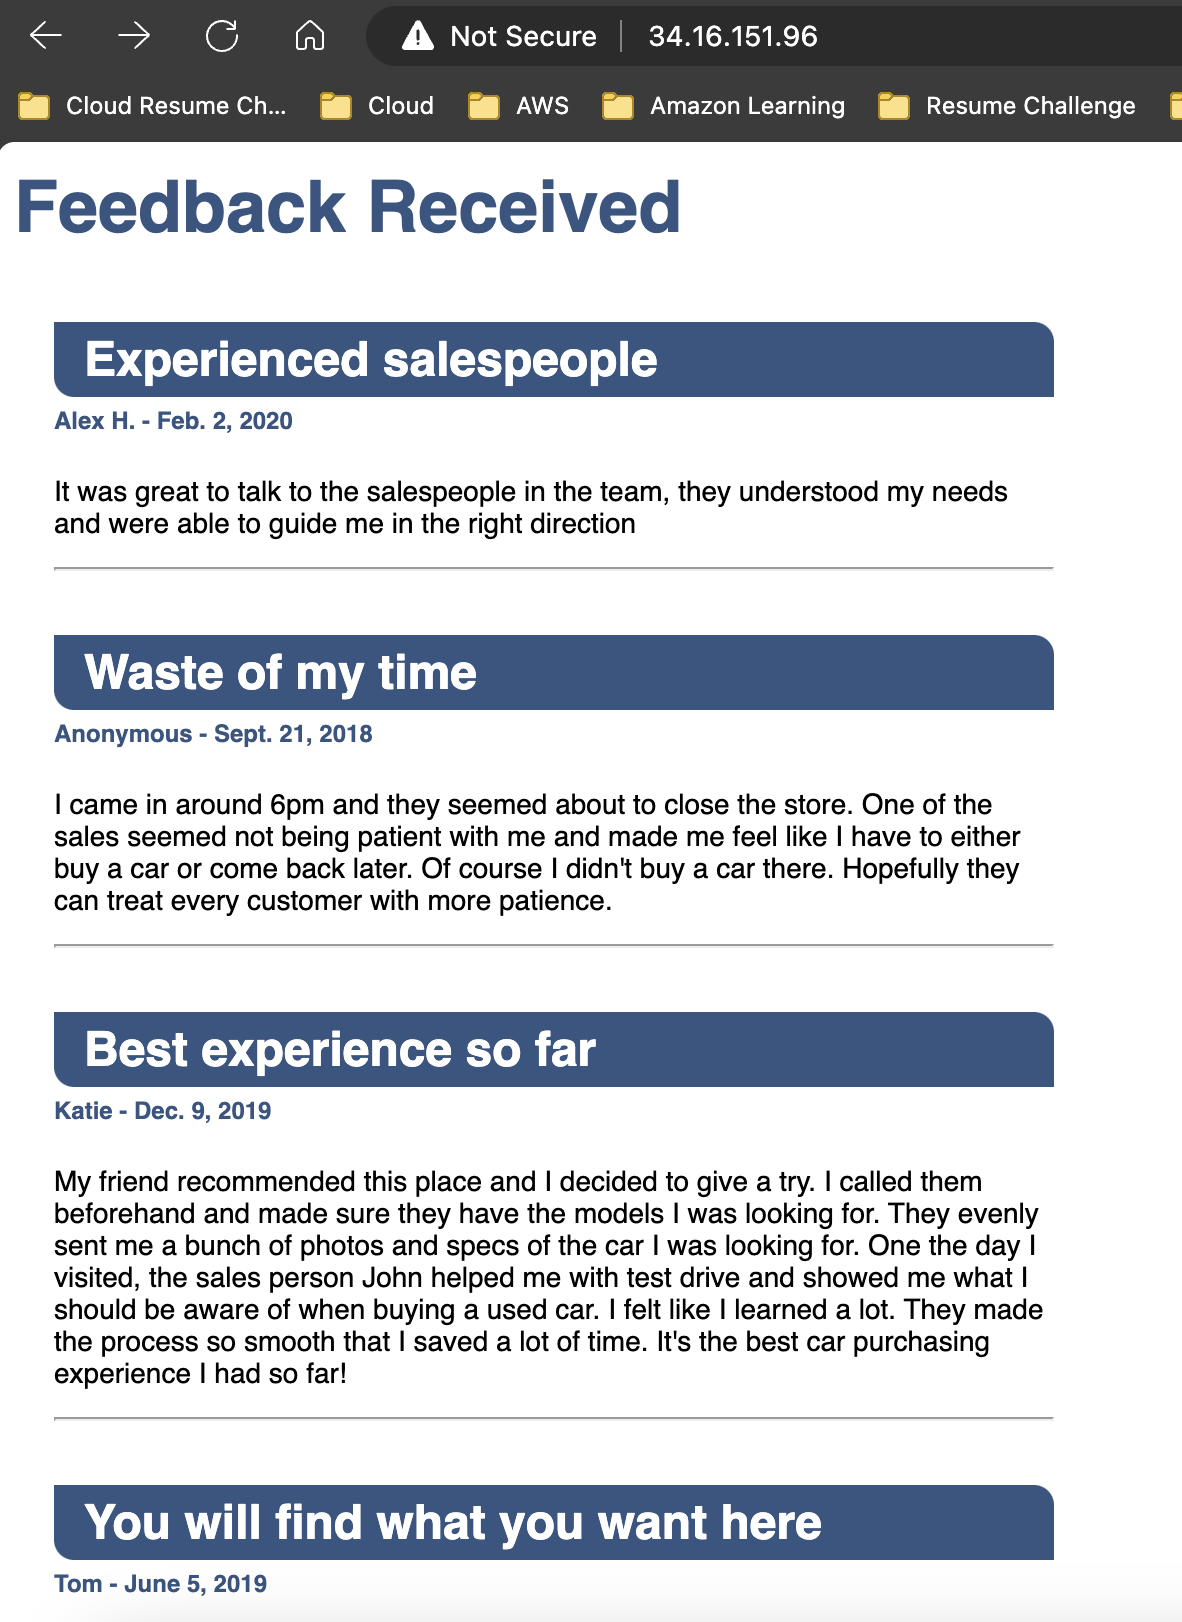